# Data Loading and Initial Inspection

First, we load the dataset and perform an initial inspection to understand its structure and data types.

In [40]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'superstore-dataset-final' dataset.
Path to dataset files: /kaggle/input/superstore-dataset-final


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv", encoding='latin1',index_col="Row ID")
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

# Data Cleaning and Preparation

Based on the initial inspection, we remove the 'Country' column as it only contains a single value ('United States'). We also convert 'Order Date' and 'Ship Date' to datetime objects and calculate the 'Time to ship' in days.

In [44]:
df["Country"].value_counts()

,count
Country,
United States,9994


The store is located only in the US so there is no need for the country column

In [45]:
df.drop(axis=1,columns="Country",inplace=True)

In [46]:
df[["Order Date","Ship Date"]] = df[["Order Date","Ship Date"]].apply(pd.to_datetime)

In [47]:
df["Category"] = df["Category"].astype("category")
df["Sub-Category"] = df["Sub-Category"].astype("category")
df["Segment"] = df["Segment"].astype("category")
df["Ship Mode"] = df["Ship Mode"].astype("category")
df["Region"] = df["Region"].astype("category")
df["Postal Code"] = df["Postal Code"].astype("category")

In [48]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

In [49]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

# Analyzing Shipping Time by State

We calculate the average shipping time for each state and identify the states with the longest shipping times.

In [50]:
df_cleaned["Time to ship"] = df_cleaned['Ship Date'] - df_cleaned['Order Date']

/tmp/ipython-input-3225810852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Time to ship"] = df_cleaned['Ship Date'] - df_cleaned['Order Date']


In [51]:
df_cleaned['Time to ship'] = df_cleaned['Time to ship'].dt.days

/tmp/ipython-input-1938892735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time to ship'] = df_cleaned['Time to ship'].dt.days


In [52]:
df_cleaned['Time to ship'].value_counts(dropna=False)

,count
Time to ship,
4,2250
5,1758
2,1049
6,995
3,832
7,503
0,411
1,315


# Analyzing Shipping Modes in States with Longest Shipping Times

We filter the data for states with the longest shipping times and analyze the distribution of shipping modes and their corresponding shipping durations within those states.

**Key Finding:** For the states with the longest shipping times (District of Columbia, Maine, and Wyoming), 'Standard Class' shipping appears to be associated with longer shipping durations compared to 'Second Class'.

/tmp/ipython-input-4286838969.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


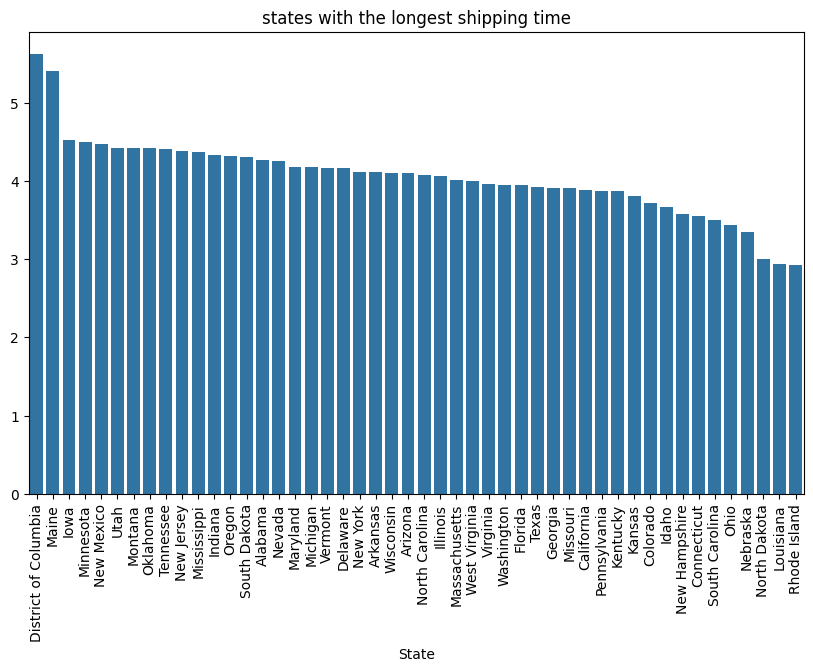

In [53]:
farthest_regions = df_cleaned.groupby('State')['Time to ship'].mean().sort_values(ascending=False)
farthest_regions = farthest_regions[farthest_regions > 2]
plt.figure(figsize=(10, 6))
g = sns.barplot(x=farthest_regions.index, y=farthest_regions.values)
g.set_title("states with the longest shipping time")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [54]:
states_to_filter = farthest_regions[farthest_regions >= 5].index.tolist()
df_filtered_states = df_cleaned[df['State'].isin(states_to_filter)]
states_shipping_mode = df_filtered_states.groupby('State')[['Ship Mode','Time to ship',]].value_counts()
states_shipping_mode

/tmp/ipython-input-2324318996.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered_states = df_cleaned[df['State'].isin(states_to_filter)]


State                 Ship Mode       Time to ship
District of Columbia  Standard Class  6               5
                      Second Class    5               3
                      First Class     4               0
                                      5               0
                                      6               0
                      Same Day        4               0
                                      5               0
                                      6               0
                      Second Class    4               0
                                      6               0
                      Standard Class  4               0
                                      5               0
Maine                 Standard Class  6               3
                                      4               1
                                      5               1
                      First Class     4               0
                                      5               0
                                      6               0
                      Same Day        4               0
                                      5               0
                                      6               0
                      Second Class    4               0
                                      5               0
                                      6               0
Name: count, dtype: int64

# Overall Shipping Mode Analysis

We also analyze the overall relationship between shipping mode and shipping duration across all states for comparison.

**Key Finding:** Across all states, 'Standard Class' generally has a slightly longer average shipping time compared to other shipping modes, although the difference is not as pronounced as in the states with the longest shipping times.

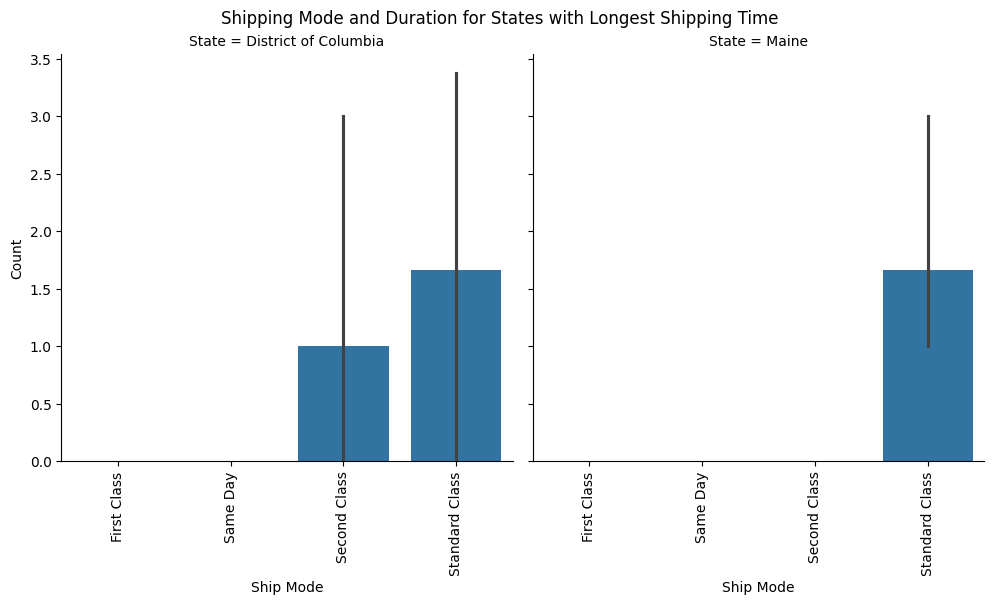

In [55]:
states_shipping_mode_df = states_shipping_mode.reset_index(name='Count') # Convert Series to DataFrame and reset index
g = sns.catplot(data=states_shipping_mode_df, x="Ship Mode", y="Count", col="State", kind="bar") # Use the new DataFrame and specify 'Count' as y, and 'Time to ship' as column for facetting
g.fig.suptitle("Shipping Mode and Duration for States with Longest Shipping Time", y=1.02) # Add a suptitle
g.set_xticklabels(rotation=90) # Rotate x-axis labels
plt.show()

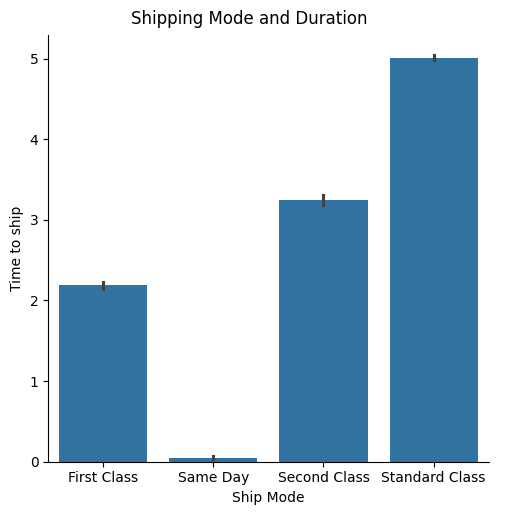

In [56]:
g = sns.catplot(
    data=df_cleaned,
    x="Ship Mode",
    y="Time to ship",
    kind="bar",
)
g.fig.suptitle("Shipping Mode and Duration", y=1.02)
plt.show()

# Analyzing Product Categories in Top States

To understand the sales performance in the top states, we analyze the distribution of product categories and sub-categories to identify the most popular items.

In [57]:
top_states = df_cleaned['State'].value_counts().head(5)
top_states = top_states.index
df_top_states = df_cleaned[df_cleaned['State'].isin(top_states)]

df_top_states_counts = df_top_states.groupby(['State', 'Category', 'Sub-Category']).size().reset_index(name='Count')
df_top_states_counts

/tmp/ipython-input-507546450.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top_states_counts = df_top_states.groupby(['State', 'Category', 'Sub-Category']).size().reset_index(name='Count')


,State,Category,Sub-Category,Count
0,California,Furniture,Accessories,0
1,California,Furniture,Appliances,0
2,California,Furniture,Art,0
3,California,Furniture,Binders,0
4,California,Furniture,Bookcases,43
...,...,...,...,...
250,Washington,Technology,Paper,0
251,Washington,Technology,Phones,32
252,Washington,Technology,Storage,0
253,Washington,Technology,Supplies,0


<Figure size 1200x800 with 0 Axes>

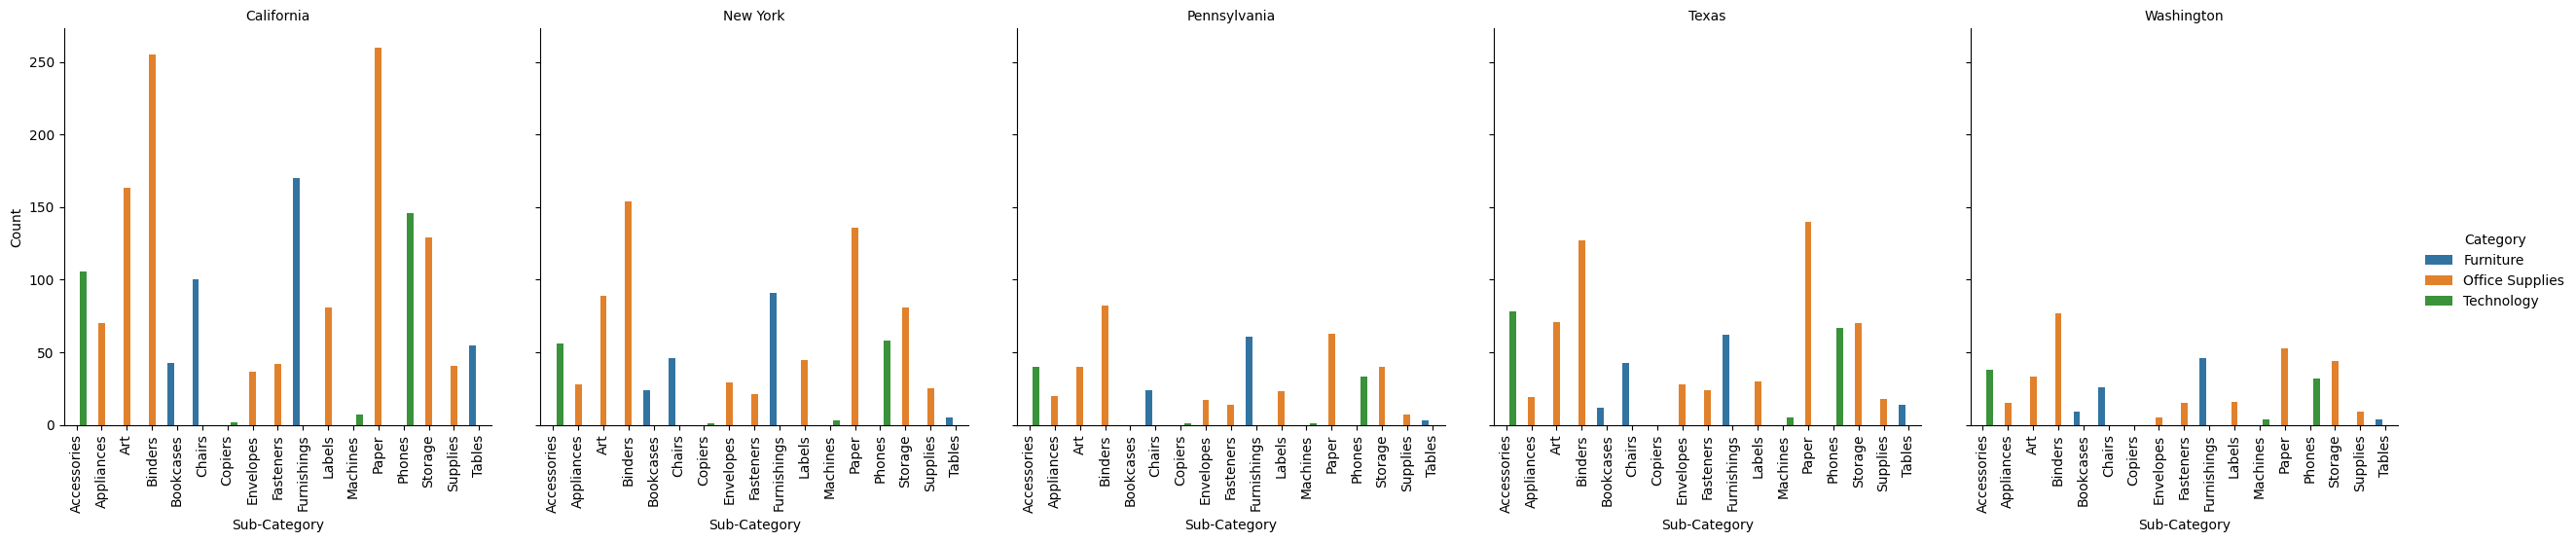

In [58]:
plt.figure(figsize=(12, 8))
g = sns.catplot(
    data=df_top_states_counts,
    col="State",
    y="Count",
    x="Sub-Category",
    hue="Category",
    kind="bar",
    sharey=True,
)
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)
plt.show()

In [59]:
# Analyze top sub-categories for each state and category
top_subcategories = df_top_states_counts.groupby(['State', 'Category']).apply(lambda x: x.nlargest(3, 'Count'), include_groups=False).reset_index()

print(top_subcategories.head())

        State         Category  level_2 Sub-Category  Count
0  California        Furniture        9  Furnishings    170
1  California        Furniture        5       Chairs    100
2  California        Furniture       16       Tables     55
3  California  Office Supplies       29        Paper    260
4  California  Office Supplies       20      Binders    255


/tmp/ipython-input-232498640.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_subcategories = df_top_states_counts.groupby(['State', 'Category']).apply(lambda x: x.nlargest(3, 'Count'), include_groups=False).reset_index()


<Figure size 1200x800 with 0 Axes>

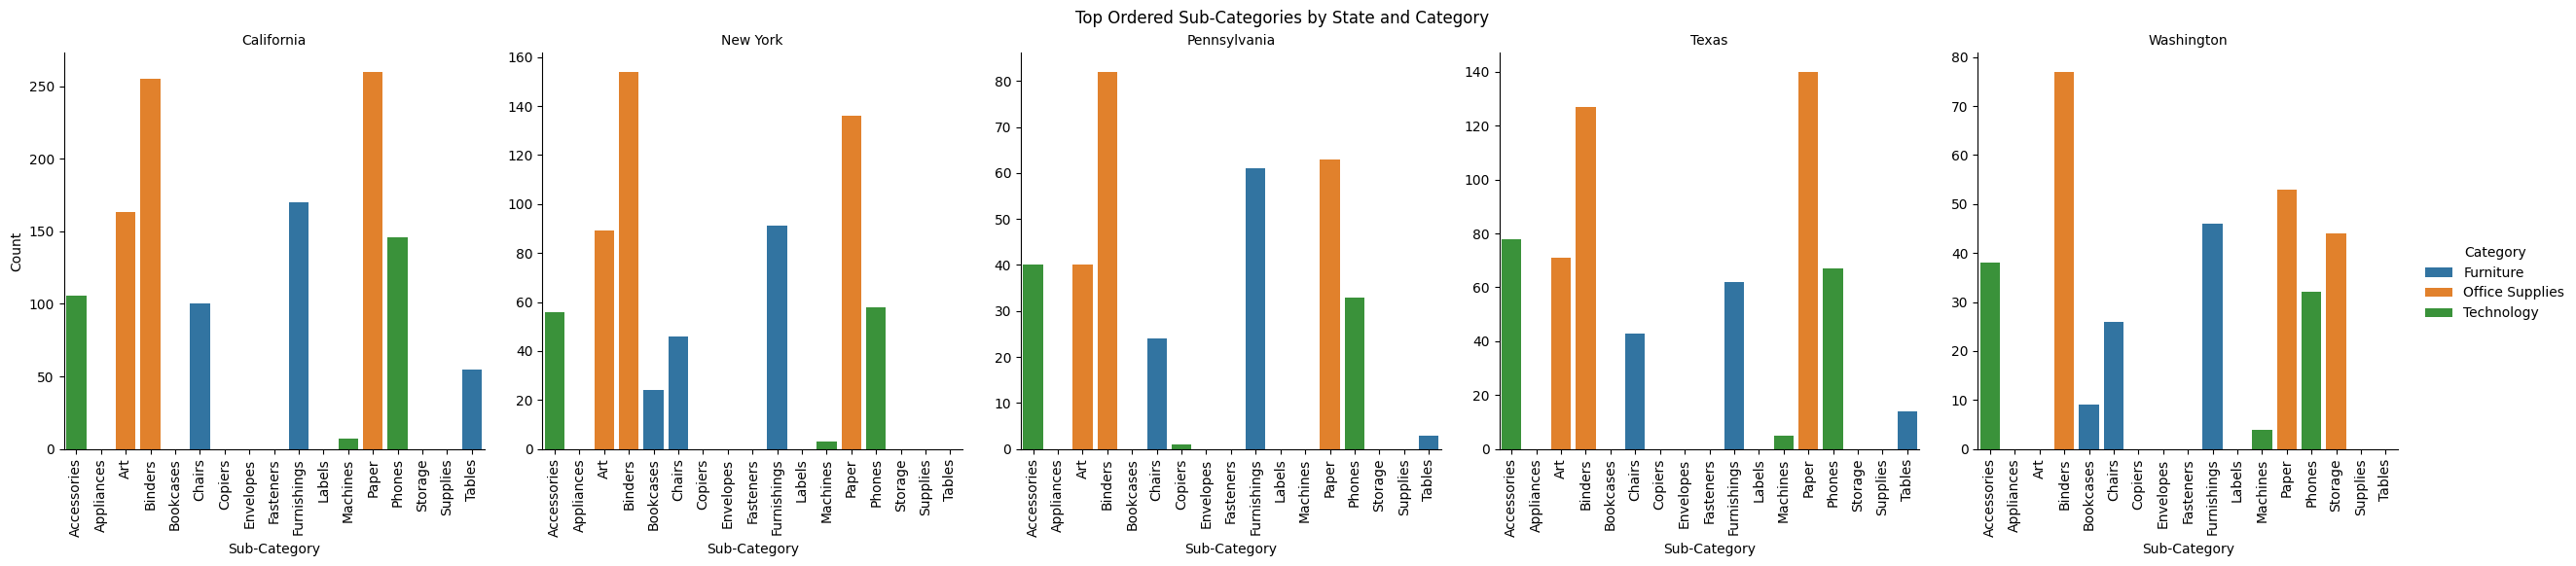

In [60]:
# Visualize top sub-categories
plt.figure(figsize=(12, 8))
g = sns.catplot(
    data=top_subcategories,
    x="Sub-Category",
    y="Count",
    hue="Category",
    col="State",
    kind="bar",
    sharey=False, # Allow different y-axis scales
)
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)
g.fig.suptitle("Top Ordered Sub-Categories by State and Category", y=1.02) # Add a suptitle
plt.show()

# Analysis of Top Ordered Products

Based on the visualization of the top sub-categories by state and category, we can confirm the key finding:

For the top 5 states (California, New York, Texas, Pennsylvania, and Washington), the most ordered items are consistently:
- **Office Supplies:** Binders and Paper
- **Furniture:** Chairs and Furnishings
- **Technology:** Phones and Accessories

This reinforces the observation about the most popular product types across these high-sales states.

# Seasonal Trend Analysis

We will now analyze the seasonal trends in sales and orders to identify any patterns throughout the year.

In [61]:
def get_meteorological_season(input_date):
    month = input_date.month
    if month in (12, 1, 2):
        return "Winter"
    elif month in (3, 4, 5):
        return "Spring"
    elif month in (6, 7, 8):
        return "Summer"
    else:
        return "Autumn"

df_cleaned['Season'] = df_cleaned['Order Date'].apply(get_meteorological_season)

x = df_cleaned["Season"].value_counts()
x = x.reset_index() # Call reset_index() to get a DataFrame
x.columns = ["Season","Count"]
display(x) # Display the resulting DataFrame

/tmp/ipython-input-1518737375.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Season'] = df_cleaned['Order Date'].apply(get_meteorological_season)


,Season,Count
0,Autumn,2976
1,Summer,1742
2,Spring,1708
3,Winter,1687


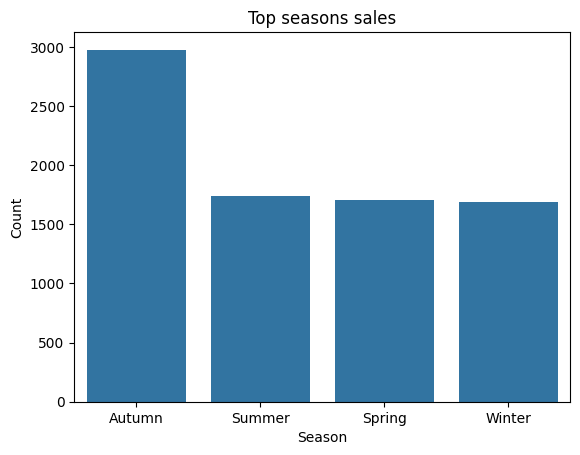

In [62]:
g = sns.barplot(
    data = x,
    x = "Season",
    y = "Count"
)
g.set_title("Top seasons sales")
plt.show()

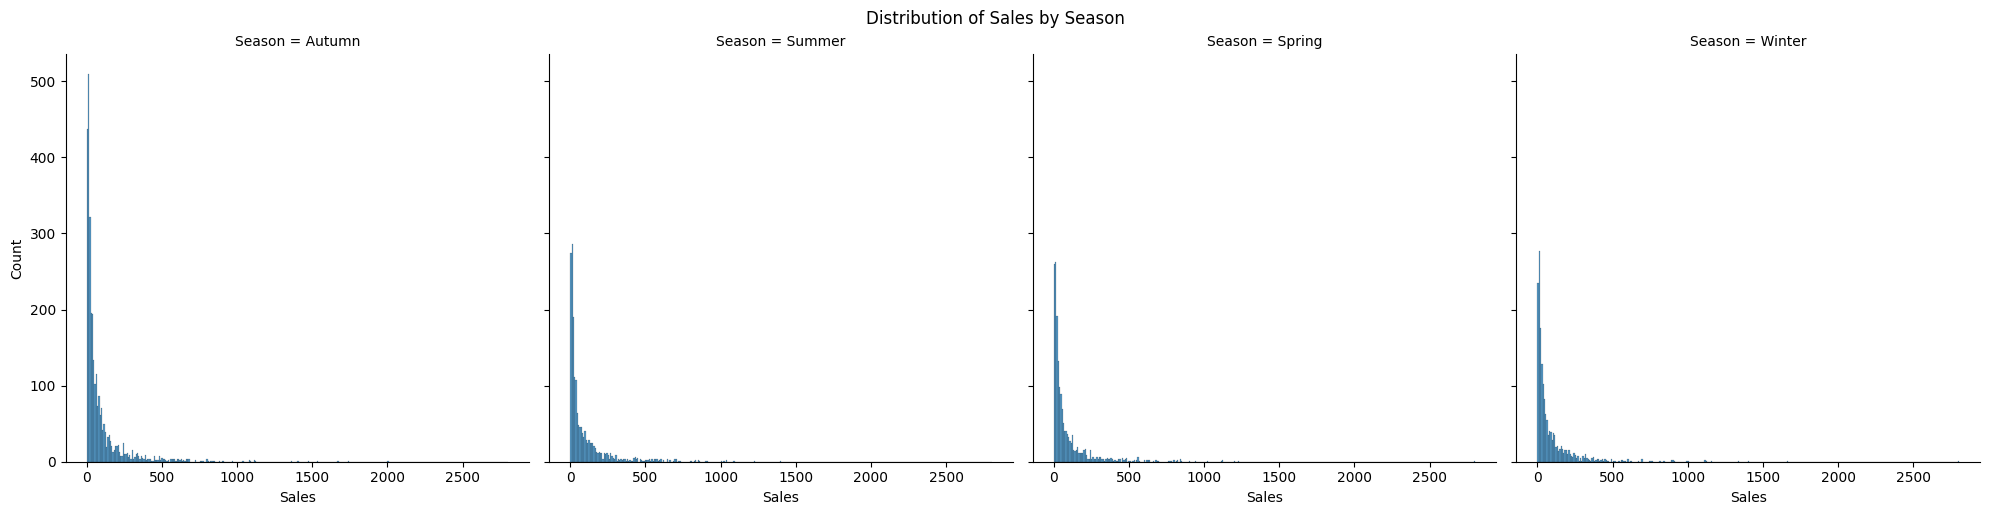

In [63]:
g = sns.displot(
    data = df_cleaned,
    x = "Sales",
    col = "Season",
    kind = "hist",
)
g.fig.suptitle("Distribution of Sales by Season", y=1.02) # Add a suptitle to the FacetGrid figure
plt.show()

/tmp/ipython-input-412738015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Order Date'].dt.month


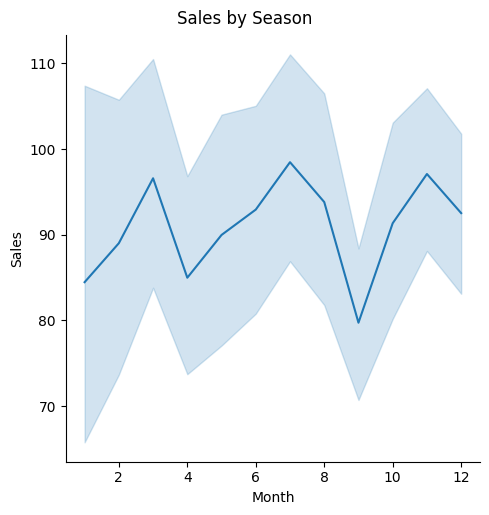

In [64]:
df_cleaned['Month'] = df_cleaned['Order Date'].dt.month
g = sns.relplot(
    data = df_cleaned,
    x = "Month",
    y = "Sales",
    kind = "line",
)
g.fig.suptitle("Sales by Season", y=1.02)
plt.show()

# Profit Analysis

We analyze the distribution of profit and investigate its relationship with other factors to understand profitability and identify potential areas for improvement.

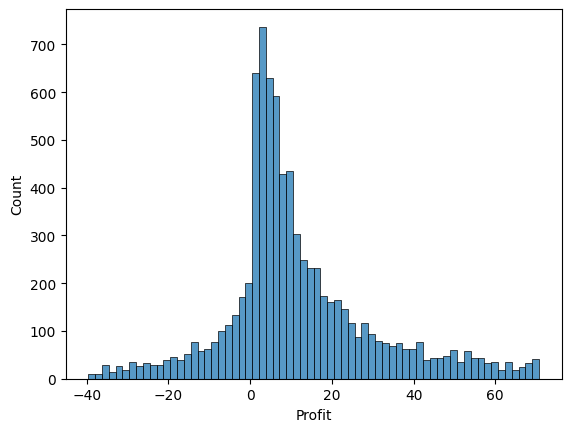

In [65]:
sns.histplot(
    data = df_cleaned,
    x = "Profit"
)
plt.show()

/tmp/ipython-input-878171811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['profit_bool'] = df_cleaned['Profit'] > 0


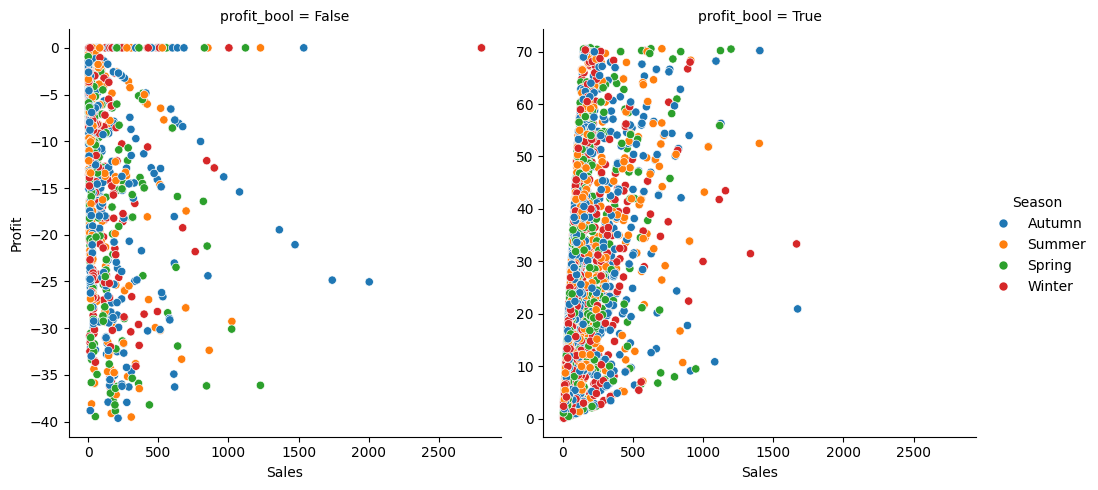

In [66]:
df_cleaned['profit_bool'] = df_cleaned['Profit'] > 0

g = sns.relplot(
    data = df_cleaned,
    x = "Sales",
    y = "Profit",
    col="profit_bool",
    kind = "scatter",
    hue = "Season",
    facet_kws={'sharey': False}
    )
plt.show()

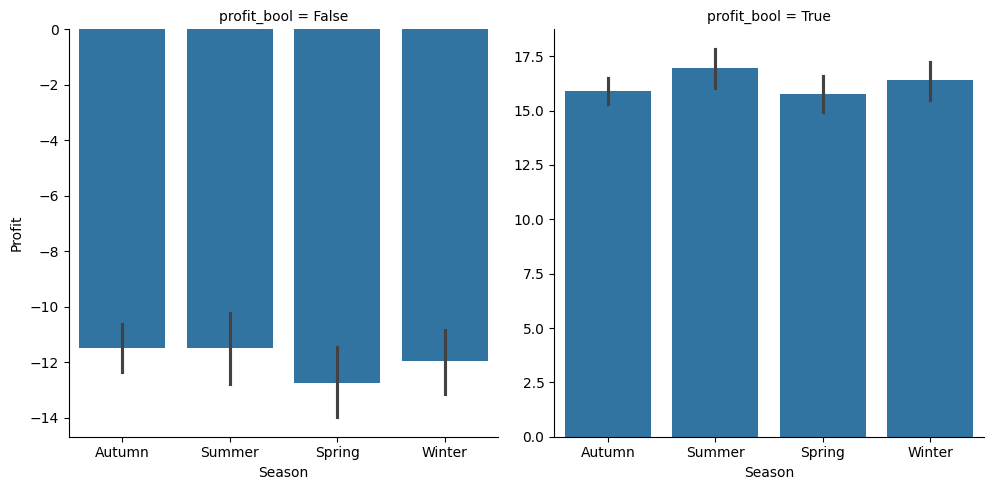

In [67]:
g = sns.catplot(
    data = df_cleaned,
    x = "Season",
    y = "Profit",
    col = "profit_bool",
    kind = "bar",
    sharey = False
)
plt.show()

In [68]:
df_cleaned.to_csv("superstore_cleaned.csv", index=False)